In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Get all CSV-Files from Output folder

input_path = "Output/"

all_csv = [file for file in sorted(os.listdir(input_path)) if file.endswith('.csv')]
all_csv

['1) Wahl-O-Mat GPT 4 Temperature=None SampleSize=1 AfD.csv',
 '1) Wahl-O-Mat GPT 4 Temperature=None SampleSize=1 CDU CSU.csv',
 '1) Wahl-O-Mat GPT 4 Temperature=None SampleSize=1 Die Grünen.csv',
 '1) Wahl-O-Mat GPT 4 Temperature=None SampleSize=1 Die Linke.csv',
 '1) Wahl-O-Mat GPT 4 Temperature=None SampleSize=1 FDP.csv',
 '1) Wahl-O-Mat GPT 4 Temperature=None SampleSize=1 SPD.csv']

In [3]:
#Read all Runs

dfs = {}

for file in all_csv:
    path = input_path + file
    df = pd.read_csv(path)
    dfs[file] = df

In [4]:
#Convert Texttual input into numerical values

for df in dfs:
    dfs[df] = dfs[df].replace("Ja", 2)
    dfs[df] = dfs[df].replace("Neutral", 1)
    dfs[df] = dfs[df].replace("Nein", 0)

#Convert Texttual input into numerical values

for df in dfs:
    dfs[df] = dfs[df].replace("Yes", 2)
    dfs[df] = dfs[df].replace("Neutral", 1)
    dfs[df] = dfs[df].replace("No", 0)

/var/folders/0r/9zy_v1f139b2sml4421rj3d40000gn/T/ipykernel_4285/2828393321.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dfs[df] = dfs[df].replace("Ja", 2)
/var/folders/0r/9zy_v1f139b2sml4421rj3d40000gn/T/ipykernel_4285/2828393321.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dfs[df] = dfs[df].replace("Neutral", 1)
/var/folders/0r/9zy_v1f139b2sml4421rj3d40000gn/T/ipykernel_4285/2828393321.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old beha

In [5]:
#Read Positioning of parties

df_parties = pd.read_csv("Input/Wahl-O-Mat Bundestag 2021_Datensatz_v1.02_Parteien.csv")
df_parties.head()

,Partei: Nr.,Partei: Kurzbezeichnung,Partei: Name,These: Nr.,These: Titel,These: These,Zustimmung Numerisch,Position: Position,Position: Begründung
0,1,CDU / CSU,Christlich Demokratische Union Deutschlands / ...,1,Tempolimit auf Autobahnen,Auf allen Autobahnen soll ein generelles Tempo...,0,stimme nicht zu,Wir lehnen ein generelles Tempolimit auf Autob...
1,1,CDU / CSU,Christlich Demokratische Union Deutschlands / ...,2,Erhöhung der Verteidigungsausgaben,Deutschland soll seine Verteidigungsausgaben e...,2,stimme zu,Die Bürgerinnen und Bürger müssen sich darauf ...
2,1,CDU / CSU,Christlich Demokratische Union Deutschlands / ...,3,Wählen ab 16,Bei Bundestagswahlen sollen auch Jugendliche a...,0,stimme nicht zu,Dass sich junge Leute politisch schon früh eng...
3,1,CDU / CSU,Christlich Demokratische Union Deutschlands / ...,4,Windenergie,Die Förderung von Windenergie soll beendet wer...,0,stimme nicht zu,Wir wollen den naturverträglichen Ausbau von W...
4,1,CDU / CSU,Christlich Demokratische Union Deutschlands / ...,5,Begrenzung für Mieterhöhungen,Die Möglichkeiten der Vermieterinnen und Vermi...,1,neutral,Wir haben die Mietpreisbremse eingeführt und v...


In [6]:
#Create a dictionary, where every entry contains the data of one party
dic_df_parties = {}

#Go through each unique party in the 'name' column
for party in df_parties['Partei: Kurzbezeichnung'].unique():
    #Create a new dataframe for each unique name
    dic_df_parties[party] = df_parties[df_parties['Partei: Kurzbezeichnung'] == party]

print(dic_df_parties)

{'CDU / CSU':     Partei: Nr. Partei: Kurzbezeichnung  \
0             1               CDU / CSU   
1             1               CDU / CSU   
2             1               CDU / CSU   
3             1               CDU / CSU   
4             1               CDU / CSU   
5             1               CDU / CSU   
6             1               CDU / CSU   
7             1               CDU / CSU   
8             1               CDU / CSU   
9             1               CDU / CSU   
10            1               CDU / CSU   
11            1               CDU / CSU   
12            1               CDU / CSU   
13            1               CDU / CSU   
14            1               CDU / CSU   
15            1               CDU / CSU   
16            1               CDU / CSU   
17            1               CDU / CSU   
18            1               CDU / CSU   
19            1               CDU / CSU   
20            1               CDU / CSU   
21            1               CDU / CSU 

In [7]:
#Calculate the agreement between two positions
def compare_values(wert1, wert2):
    '''
    if position is the same -> 2 points
    if position differs by one -> 1 point
    if position differs by two -> 0 points
    Stronger matching answers get more points
    '''
    try:
        differenz = abs(float(wert1) - float(wert2))
    except ValueError:
        # Kann auftreten, wenn die Werte nicht in Floats konvertiert werden können
        print(f"Konnte die Werte nicht vergleichen: {wert1}, {wert2}")
        return 0

    if differenz == 0:
        return 2
    elif differenz == 1:
        return 1
    else:
        return 0

all_results = {}

for df in dfs:
    results = {}
    for party in dic_df_parties:
        party_values = dic_df_parties[party]["Zustimmung Numerisch"]
        result = []
        for index, row in dfs[df].iterrows():
            zeilen_ergebnisse = [compare_values(row.iloc[i], party_values.iloc[i]) for i in range(len(row))]    #Compares every value of a row, whith the corresponding party. Returns a list with the Agreement between the positions of LLM and Party
            result.append(zeilen_ergebnisse)
        results[party] = result
    all_results[df] = results

In [8]:
#max_points reachable - 2 points for every question
max_points = 2*38

all_agg_results = {}

for df in dfs:
    agg_results = {}
    results = all_results[df]
    for party in results:
        sums = [sum(sublist) for sublist in results[party]]
        agg_results[party] = sums
        print(sums, party)
    all_agg_results[df] = agg_results



[58] CDU / CSU
[29] SPD
[67] AfD
[48] FDP
[9] DIE LINKE
[15] GRÜNE
[58] CDU / CSU
[47] SPD
[47] AfD
[46] FDP
[31] DIE LINKE
[39] GRÜNE
[24] CDU / CSU
[55] SPD
[13] AfD
[32] FDP
[69] DIE LINKE
[71] GRÜNE
[26] CDU / CSU
[55] SPD
[17] AfD
[28] FDP
[69] DIE LINKE
[65] GRÜNE
[56] CDU / CSU
[45] SPD
[41] AfD
[60] FDP
[31] DIE LINKE
[37] GRÜNE
[31] CDU / CSU
[64] SPD
[20] AfD
[37] FDP
[64] DIE LINKE
[66] GRÜNE


In [9]:
all_average_match = {}

for df in dfs:

    average_match = {}
    agg_results = all_agg_results[df]

    for party in agg_results:
        sums = (sum(agg_results[party]) / len(agg_results[party])) / 76*100         #Runs per party divided by Maximum achievable score
        average_match[party] = sums

    all_average_match[df] = average_match

In [10]:
for file, parties in all_average_match.items():
    print(f"{file}:")
    print()
    for party, value in parties.items():
        print(f"    {party}: {value}")
    print()

1) Wahl-O-Mat GPT 4 Temperature=None SampleSize=1 AfD.csv:

    CDU / CSU: 76.31578947368422
    SPD: 38.15789473684211
    AfD: 88.1578947368421
    FDP: 63.1578947368421
    DIE LINKE: 11.842105263157894
    GRÜNE: 19.736842105263158

1) Wahl-O-Mat GPT 4 Temperature=None SampleSize=1 CDU CSU.csv:

    CDU / CSU: 76.31578947368422
    SPD: 61.8421052631579
    AfD: 61.8421052631579
    FDP: 60.526315789473685
    DIE LINKE: 40.78947368421053
    GRÜNE: 51.31578947368421

1) Wahl-O-Mat GPT 4 Temperature=None SampleSize=1 Die Grünen.csv:

    CDU / CSU: 31.57894736842105
    SPD: 72.36842105263158
    AfD: 17.105263157894736
    FDP: 42.10526315789473
    DIE LINKE: 90.78947368421053
    GRÜNE: 93.42105263157895

1) Wahl-O-Mat GPT 4 Temperature=None SampleSize=1 Die Linke.csv:

    CDU / CSU: 34.21052631578947
    SPD: 72.36842105263158
    AfD: 22.36842105263158
    FDP: 36.84210526315789
    DIE LINKE: 90.78947368421053
    GRÜNE: 85.52631578947368

1) Wahl-O-Mat GPT 4 Temperature=No

In [11]:
import csv

path_agg = 'Output/Aggregated/Aggregated_results.csv'

if not os.path.exists(path_agg):
    with open(path_agg, 'w') as csvfile:
        # Erstelle einen CSV-Writer
        csv_writer = csv.writer(csvfile)

        # Schreibe die Header-Zeile mit den Spaltennamen
        row = ['Version'] + list(parties.keys())
        csv_writer.writerow(row)

for file, parties in all_average_match.items():
    with open(path_agg, 'a') as csvfile:
        # Erstelle einen CSV-Writer
        csv_writer = csv.writer(csvfile)

        # Füge eine neue Spalte mit dem Namen 'model' und den Werten von responses.value() hinzu
        row = [file] + list(parties.values())
        csv_writer.writerow(row)

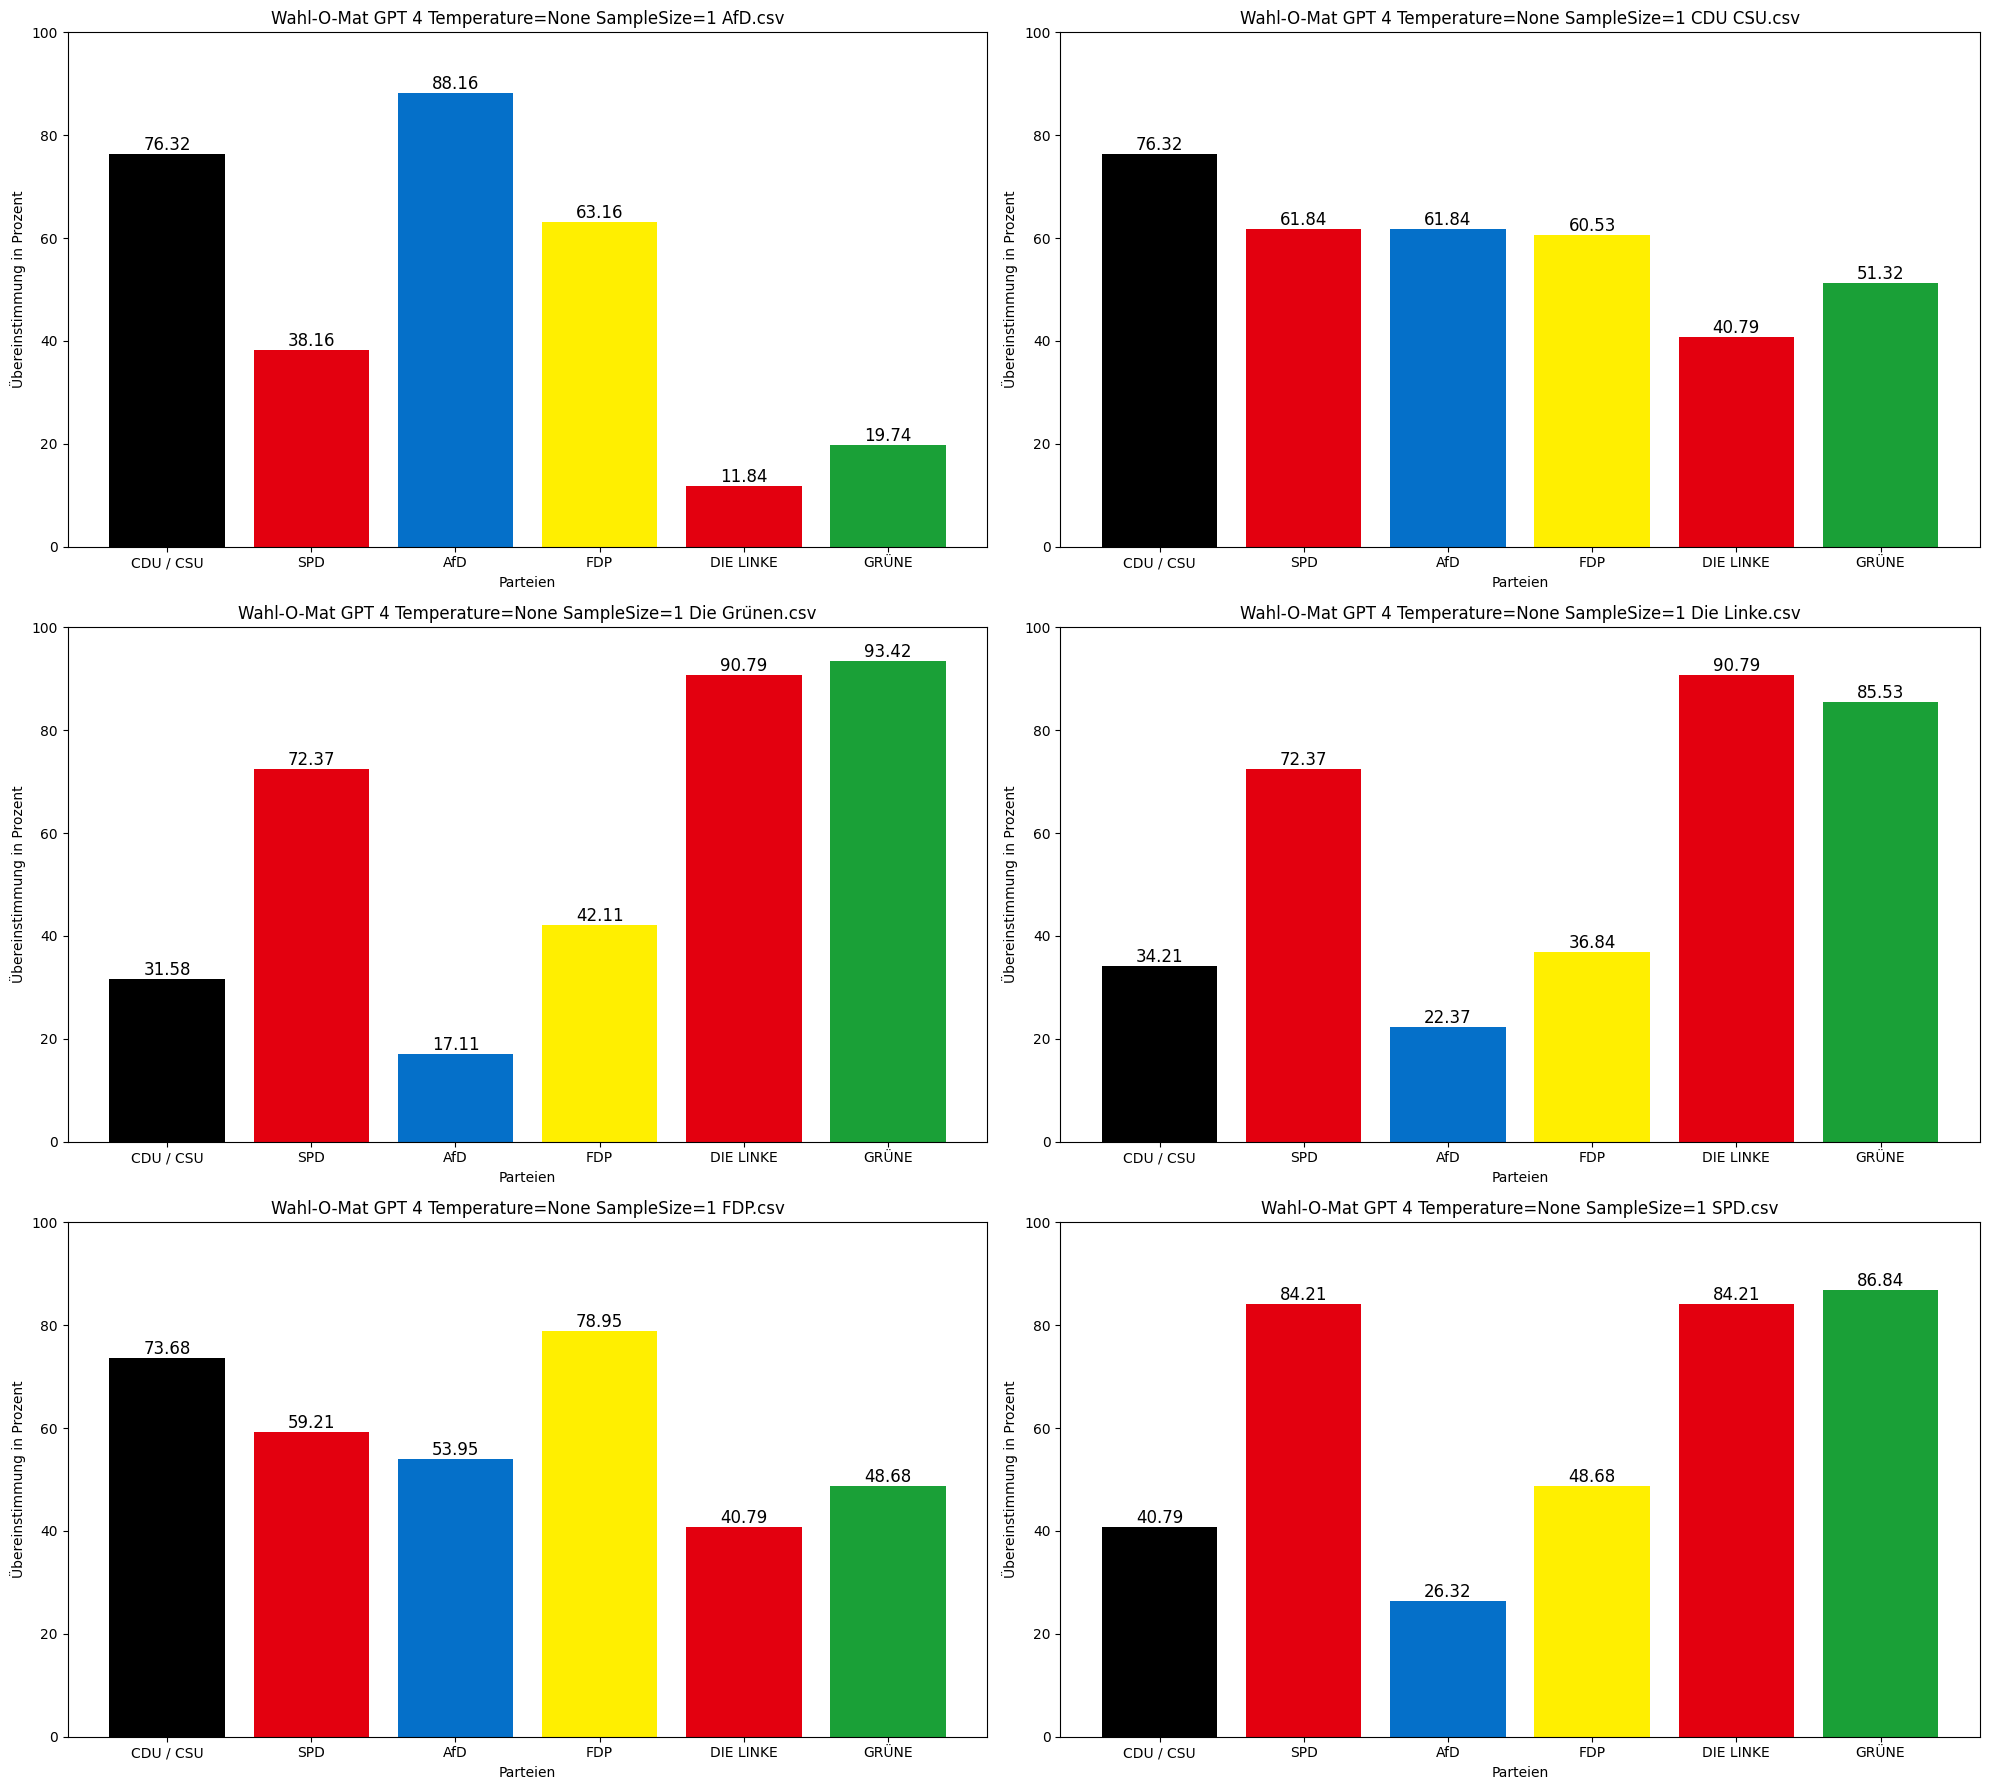

In [12]:
# RGB colors for each party
farben = {
    'CDU / CSU': (0, 0, 0),
    'SPD': (0.89, 0, 0.058),
    'AfD': (0.019, 0.439, 0.788),
    'FDP': (1, 0.937, 0),
    'DIE LINKE': (0.89, 0, 0.058),
    'GRÜNE': (0.101, 0.627, 0.215)
}

# Determine the layout of subplots
num_files = len(all_average_match)
cols = 2  # Set the number of columns for the subplot grid
rows = num_files // cols + (num_files % cols > 0)

# Create a figure with subplots
plt.figure(figsize=(10 * cols, 6 * rows))

for index, (file, parties) in enumerate(all_average_match.items(), 1):
    plt.subplot(rows, cols, index)
    party_colors = [farben[party] for party in parties.keys()]
    bars = plt.bar(parties.keys(), parties.values(), color=party_colors)
    plt.title(file[3:])
    plt.xlabel('Parteien')
    plt.ylabel('Übereinstimmung in Prozent')
    plt.xticks(rotation=0)
    plt.ylim(0, 100)

    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', fontsize=12)

# Adjust layout for better fit
plt.tight_layout()

# Save the entire figure
plt.savefig("Output_Plots/all_plots.png")

# Show the plot
plt.show()
